In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data = pd.read_csv("201008_marketing_customer_analysis.csv")


In [2]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
data_filtered = data.select_dtypes('number')
data_filtered

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [4]:
# X-y split. (_done_)
y = data_filtered['Total Claim Amount']
x = data_filtered.drop('Total Claim Amount', axis=1)
x = x.select_dtypes('number')
len(x.columns)

7

In [5]:
# Normalize (numerical). (_done_)
from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(data_filtered)
x_normalized = transformer.transform(data_filtered)
x_normalized

data_normalized = pd.DataFrame(data=x_normalized)
data_normalized.columns = data_normalized.columns.astype(str)
data_normalized.rename(columns={'0':'Customer Lifetime Value', '1':'Income', '2':'Monthly Premium Auto', '3':'Months Since Last Claim', '4':'Months Since Policy Inception', '5':'Number of Open Complaints', '6':'Number of Policies', '7':'Total Claim Amount'}, inplace=True)
data_normalized.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,0.049048,0.998772,0.001225,0.000568,0.000089,0.0,0.000018,0.006830
1,0.987006,0.000000,0.013293,0.001838,0.005939,0.0,0.001131,0.160005
2,0.255478,0.966747,0.002141,0.000357,0.000753,0.0,0.000040,0.011230
3,0.997473,0.000000,0.013829,0.002348,0.008480,0.0,0.000913,0.069128
4,0.064055,0.997940,0.001662,0.000273,0.001002,0.0,0.000023,0.003145


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [81]:
data.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [7]:
#Things like "ProductID" or "ClientID" can be deleted because they don't have any predictive power.
#Regarding the dates, they can't be used directly because of their format. What you CAN do is to compute time difference (in days, weeks, months, o whatever unit of time you consider relevant for business case) between the date and the current date. Then you can use this difference to make predictions.
#For example use the time lapse between a product launch and today as a predictor to predict of a product.

# For the sake of advancing in the exercise, I am dropping 'Effective to date', but I should do something with it!
# Select categorical columns.
data_cat = data.drop(columns = ['Effective To Date', 'Customer', 'Customer Lifetime Value', 'Income', 'Monthly Premium Auto', 'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount'], inplace=False)
data_cat.head()

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


##### One Hot/Label Encoding (categorical).

In [8]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(data_cat)
encoded = encoder.transform(data_cat).toarray()
display(encoded)

array([[0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 1., 1., 0.]])

In [9]:
new_data = pd.get_dummies(data_cat, drop_first = True)
new_data

,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,Coverage_Extended,Coverage_Premium,Education_College,Education_Doctor,Education_High School or Below,...,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
9130,1,0,0,0,1,1,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
9131,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
9132,1,0,0,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


##### Concat DataFrames

In [10]:
concat_data = pd.concat([new_data, data_normalized], axis=1)
concat_data.head()

,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,Coverage_Extended,Coverage_Premium,Education_College,Education_Doctor,Education_High School or Below,...,Vehicle Size_Medsize,Vehicle Size_Small,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,0,0,0,1,0,0,0,0,0,0,...,1,0,0.049048,0.998772,0.001225,0.000568,0.000089,0.0,0.000018,0.006830
1,0,0,0,0,0,1,0,0,0,0,...,1,0,0.987006,0.000000,0.013293,0.001838,0.005939,0.0,0.001131,0.160005
2,0,1,0,0,0,0,1,0,0,0,...,1,0,0.255478,0.966747,0.002141,0.000357,0.000753,0.0,0.000040,0.011230
3,1,0,0,0,0,0,0,0,0,0,...,1,0,0.997473,0.000000,0.013829,0.002348,0.008480,0.0,0.000913,0.069128
4,0,0,0,1,0,0,0,0,0,0,...,1,0,0.064055,0.997940,0.001662,0.000273,0.001002,0.0,0.000023,0.003145


### TRAIN THE MODEL

In [121]:
# Train-test split.
type(concat_data)

pandas.core.frame.DataFrame

In [122]:
list(concat_data)

['State_California',
 'State_Nevada',
 'State_Oregon',
 'State_Washington',
 'Response_Yes',
 'Coverage_Extended',
 'Coverage_Premium',
 'Education_College',
 'Education_Doctor',
 'Education_High School or Below',
 'Education_Master',
 'EmploymentStatus_Employed',
 'EmploymentStatus_Medical Leave',
 'EmploymentStatus_Retired',
 'EmploymentStatus_Unemployed',
 'Gender_M',
 'Location Code_Suburban',
 'Location Code_Urban',
 'Marital Status_Married',
 'Marital Status_Single',
 'Policy Type_Personal Auto',
 'Policy Type_Special Auto',
 'Policy_Corporate L2',
 'Policy_Corporate L3',
 'Policy_Personal L1',
 'Policy_Personal L2',
 'Policy_Personal L3',
 'Policy_Special L1',
 'Policy_Special L2',
 'Policy_Special L3',
 'Renew Offer Type_Offer2',
 'Renew Offer Type_Offer3',
 'Renew Offer Type_Offer4',
 'Sales Channel_Branch',
 'Sales Channel_Call Center',
 'Sales Channel_Web',
 'Vehicle Class_Luxury Car',
 'Vehicle Class_Luxury SUV',
 'Vehicle Class_SUV',
 'Vehicle Class_Sports Car',
 'Vehicle 

In [145]:
Y = concat_data[['Income']]

In [146]:
Y.head()

,Income
0,0.998772
1,0.000000
2,0.966747
3,0.000000
4,0.997940


In [147]:
X = concat_data[['Customer Lifetime Value','Monthly Premium Auto','Months Since Last Claim','Months Since Policy Inception','Number of Open Complaints','Number of Policies','Total Claim Amount']]

In [148]:
X.head()

,Customer Lifetime Value,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,0.049048,0.001225,0.000568,0.000089,0.0,0.000018,0.006830
1,0.987006,0.013293,0.001838,0.005939,0.0,0.001131,0.160005
2,0.255478,0.002141,0.000357,0.000753,0.0,0.000040,0.011230
3,0.997473,0.013829,0.002348,0.008480,0.0,0.000913,0.069128
4,0.064055,0.001662,0.000273,0.001002,0.0,0.000023,0.003145


In [149]:
from sklearn.model_selection import train_test_split

In [150]:
X_train, X_test, Y_train, Y_test = train_test_split(X ,Y, test_size = 0.3, random_state = 100)

In [151]:
X_train.head()

,Customer Lifetime Value,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
8720,0.339873,0.005138,0.002308,0.001117,0.000298,0.000223,0.024661
6092,0.552628,0.002920,0.000107,0.000997,0.000000,0.000071,0.014015
1412,0.082391,0.001077,0.000114,0.000669,0.000033,0.000147,0.004802
4717,0.070641,0.001735,0.000468,0.000661,0.000000,0.000014,0.004725
3725,0.996445,0.011586,0.001867,0.001223,0.000193,0.000129,0.083417


In [152]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X ,Y, test_size = 0.3, random_state = 100)

In [153]:
X_train2.head()

,Customer Lifetime Value,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
8720,0.339873,0.005138,0.002308,0.001117,0.000298,0.000223,0.024661
6092,0.552628,0.002920,0.000107,0.000997,0.000000,0.000071,0.014015
1412,0.082391,0.001077,0.000114,0.000669,0.000033,0.000147,0.004802
4717,0.070641,0.001735,0.000468,0.000661,0.000000,0.000014,0.004725
3725,0.996445,0.011586,0.001867,0.001223,0.000193,0.000129,0.083417


### Apply linear regression.


In [154]:
from sklearn.linear_model import LinearRegression

In [155]:
model = LinearRegression()

In [156]:
lm = model.fit(X_train, Y_train)

In [157]:
predictions = lm.predict(X_test)

In [158]:
predictions

array([[1.0438269 ],
       [0.90529989],
       [0.96333202],
       ...,
       [0.97772454],
       [0.4218461 ],
       [1.06899979]])

In [159]:
# difference between predictions and real values
residuals = predictions - Y_test

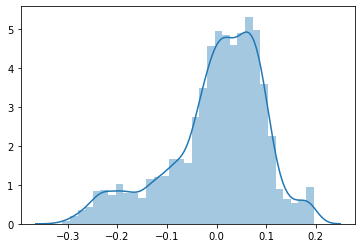

In [160]:
# Model is not normally distributed
sns.distplot(residuals)

### Model Validation - Check Error Metrics

In [161]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_error

In [162]:
#Description:
data_filtered.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [163]:
# R2.
R2 = r2_score(Y_test, predictions)
print("R2 of the linear model on test set: %5.3f" % (R2))

R2 of the linear model on test set: 0.947


In [164]:
# MSE.
MSE = mean_squared_error(Y_test, predictions)
print("MSE of the linear model on test set: %5.3f" % (MSE))

MSE of the linear model on test set: 0.009


In [165]:
# RMSE.
from math import sqrt
RMSE = sqrt(mean_squared_error(Y_test, predictions))
print("RMSE of the linear model on test set: %5.3f" % (RMSE))

RMSE of the linear model on test set: 0.097


In [166]:
# MAE.
MAE = mean_absolute_error(Y_test, predictions)
print("MAE of the linear model on test set: %5.3f" % (MAE))

MAE of the linear model on test set: 0.075
